# lomin - MbilNet

## Prediction angle


---
## 데이터 설명 - Stanford Cars Dataset (1.85 GB)

http://ai.stanford.edu/~jkrause/cars/car_dataset.html

196 class의 (차종)

8,144 개의 train 이미지 

8,041 개의 test 이미지

총 16,185 개의 이미지로 구성


* 

주어진 데이터는 바운딩 박스의 좌표 데이터도 함께 주어졌다. 따라서 전처리로 선행되어야 할 바운딩 처리는 생략하고 진행한다.

---

##Data set 정보
- train.csv - Train 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
- test.csv - Test 셋의 이미지 파일명, 바운딩박스 좌표, 차종정보
- class.csv - 데이터 셋의 class 컬럼과 대응되는 차종의 레이블
- train - Train 이미지 파일
- test - Test 이미지 파일

---

## 목표 

1. 이미지에서 자동차 인식

2. 구분된 자동차의 차종 분류 예측  
   (test 의 class 가 target이 된다.)

---


In [9]:
import os
import gc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ## 드라이브 마운트

# from google.colab import drive
# drive.mount('/content/drive/')

### 파일 로드 및 확인

In [3]:
DATA_PATH = 'D:/coding/data_set/lomin/train_copy'
os.listdir(DATA_PATH)

['train',
 'train_angle',
 'train_angle_ro',
 'train_angle_ro1',
 'train_crop',
 'val',
 'val_angle',
 'val_angle1',
 'val_angle_ro',
 'val_angle_ro1',
 'val_crop']

In [1]:
import pandas as pd

# train 데이터 프레임 만들기
df_train = pd.DataFrame(columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class'])
df_test = pd.DataFrame(columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class'])

In [ ]:
%%time
## 테이터 프레임에 xml 정보 추가 (각각 폴더 순환)

import imgaug as ia
import os
from imgaug import augmenters as iaa
import xml.etree.ElementTree as ET

ia.seed(1)

# train dir
dir = DATA_PATH + '/train_angle_ro/'

# val dir
# dir = DATA_PATH + '/val_angle_ro/'


# 모든 폴더 순환
for j in sorted(os.listdir(dir)):

        if not '.ini' in j:           
            dir_2 = dir + j + '/'
     
            ## 폴더안에 있는 모든 xml 파일 이름 가져오기
            file_list = os.listdir(dir_2)
            xml_list = []
            
            for file in file_list:
                if '.xml' in file:
                    xml_list.append(file)

            ## 모든 .xml파일에 대해 수정
            for xml_file in xml_list:
                target_path = dir_2 + xml_file

                tree = ET.parse(target_path)
                root = tree.getroot()
                bounding_box_list = []

                file_name = root.find('filename').text
                object_label = root.find('object/name').text
                x_min = int(root.find('object/bndbox/xmin').text)
                y_min = int(root.find('object/bndbox/ymin').text)
                x_max = int(root.find('object/bndbox/xmax').text)
                y_max = int(root.find('object/bndbox/ymax').text)
                        
                bounding_box = [file_name, x_min, y_min, x_max, y_max, object_label]

                # trian 데이터 프레임에 추가하기
                df_train = df_train.append(pd.DataFrame([[file_name, x_min, y_min, x_max, y_max, object_label]], 
                                                        columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class']),
                                                        ignore_index=True)
                
                # # val 데이터 프레임에 추가하기
                # df_test = df_test.append(pd.DataFrame([[file_name, x_min, y_min, x_max, y_max, object_label]], 
                #                                         columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class']),
                #                                         ignore_index=True)



In [5]:
len(os.listdir(dir))

216000

---
(통합폴더 (패스))

In [11]:
import pandas as pd

# train 데이터 프레임 만들기
df_train = pd.DataFrame(columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class'])
df_val = pd.DataFrame(columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class'])


In [16]:
%%time
## 테이터 프레임에 xml 정보 추가 (통합 폴더)

import imgaug as ia
import os
from imgaug import augmenters as iaa
import xml.etree.ElementTree as ET

ia.seed(1)

# train dir
# dir = DATA_PATH + '/train_angle_ro/'

# val dir
dir = DATA_PATH + '/val_angle_ro/'


# # 모든 폴더 순환
# for j in sorted(os.listdir(dir)):

#         if not '.ini' in j:
#             dir_2 = dir + j + '/'
     
## 폴더안에 있는 모든 xml 파일 이름 가져오기
file_list = os.listdir(dir)
xml_list = []

for file in file_list:
    if '.xml' in file:
        xml_list.append(file)

## 모든 .xml파일에 대해 수정
for xml_file in xml_list:
    target_path = dir + xml_file

    tree = ET.parse(target_path)
    root = tree.getroot()
    bounding_box_list = []

    file_name = root.find('filename').text
    object_label = root.find('object/name').text
    x_min = int(root.find('object/bndbox/xmin').text)
    y_min = int(root.find('object/bndbox/ymin').text)
    x_max = int(root.find('object/bndbox/xmax').text)
    y_max = int(root.find('object/bndbox/ymax').text)
            
    bounding_box = [file_name, x_min, y_min, x_max, y_max, object_label]

    # # trian 데이터 프레임에 추가하기
    # df_train = df_train.append(pd.DataFrame([[file_name, x_min, y_min, x_max, y_max, object_label]], 
    #                                         columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class']),
    #                                         ignore_index=True)
    
    # val 데이터 프레임에 추가하기
    df_test = df_test.append(pd.DataFrame([[file_name, x_min, y_min, x_max, y_max, object_label]], 
                                            columns=['img_file', 'bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class']),
                                            ignore_index=True)



Wall time: 9.97 s


---

In [13]:
df_train

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,000000_134.png,19,366,1634,1972,134
1,000000_135.png,21,364,1632,1974,135
2,000000_16.png,189,398,1464,1940,16
3,000000_203.png,132,371,1521,1967,203
4,000000_207.png,103,361,1550,1977,207
...,...,...,...,...,...,...
107995,011947_238.png,10,415,1641,1922,238
107996,011947_337.png,132,371,1521,1967,337
107997,011947_48.png,15,373,1637,1966,48
107998,011947_72.png,46,515,1606,1824,72


In [17]:
df_test

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,000000_132.png,15,372,1638,1966,132
1,000000_164.png,189,398,1464,1940,164
2,000001_67.png,29,474,1624,1864,67
3,000002_115.png,23,460,1630,1878,115
4,000002_210.png,84,356,1569,1982,210
...,...,...,...,...,...,...
7195,011940_61.png,14,433,1638,1905,61
7196,011942_133.png,16,370,1635,1969,133
7197,011943_339.png,147,377,1506,1960,339
7198,011944_216.png,52,352,1599,1985,216


---

In [21]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train_angle_ro')
TEST_IMG_PATH = os.path.join(DATA_PATH, 'val_angle_ro')

# CSV 파일 경로
# df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
# df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
# df_class = pd.read_csv(os.path.join(DATA_PATH, 'class.csv'))

# IMG_SIZE
img_size = (224, 224)

In [7]:
df_class.head() 

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


In [8]:
df_class[df_class['id'] == 32]

,id,name
31,32,BMW X5 SUV 2007


## 이미지 상위 폴더로 이동

In [103]:
%%time

## train_angle_ro , val_angle_ro 폴더 내 png, xml 파일 하나의 폴더로 통합하기
import os
import shutil

## 폴더 안 모든 하위 파일을 읽어 리스트로 반환
def read_all_file(path): 
    output = os.listdir(path) 
    file_list = [] 
    
    for i in output: 
        if os.path.isdir(path+"/"+i): 
            file_list.extend(read_all_file(path+"/"+i)) 
        elif os.path.isfile(path+"/"+i): 
            file_list.append(path+"/"+i) 
    return file_list

## 폴더 내 모든 하위파일을 새로운 경로로 복사
def copy_all_file(file_list, new_path): 
    for src_path in file_list: 
        file = src_path.split("/")[-1] 
        shutil.copyfile(src_path, new_path+"/"+file)
        
## train_angle_ro 폴더 하부 이동
# src_path = TRAIN_IMG_PATH
# new_path = os.path.join(DATA_PATH, 'train_ro')

## val_angle_ro 폴더 하부 이동
src_path = TEST_IMG_PATH
new_path = os.path.join(DATA_PATH, 'val_ro')

file_list = read_all_file(src_path) 
copy_all_file(file_list, new_path)



Wall time: 1min 10s


### 이후 train_angle_ro , val_angle_ro 파일을 삭제하고, train_ro 와 val_ro 폴더 이름을 바꿔준다.

## 이미지 확인

In [19]:
import PIL
from PIL import ImageDraw

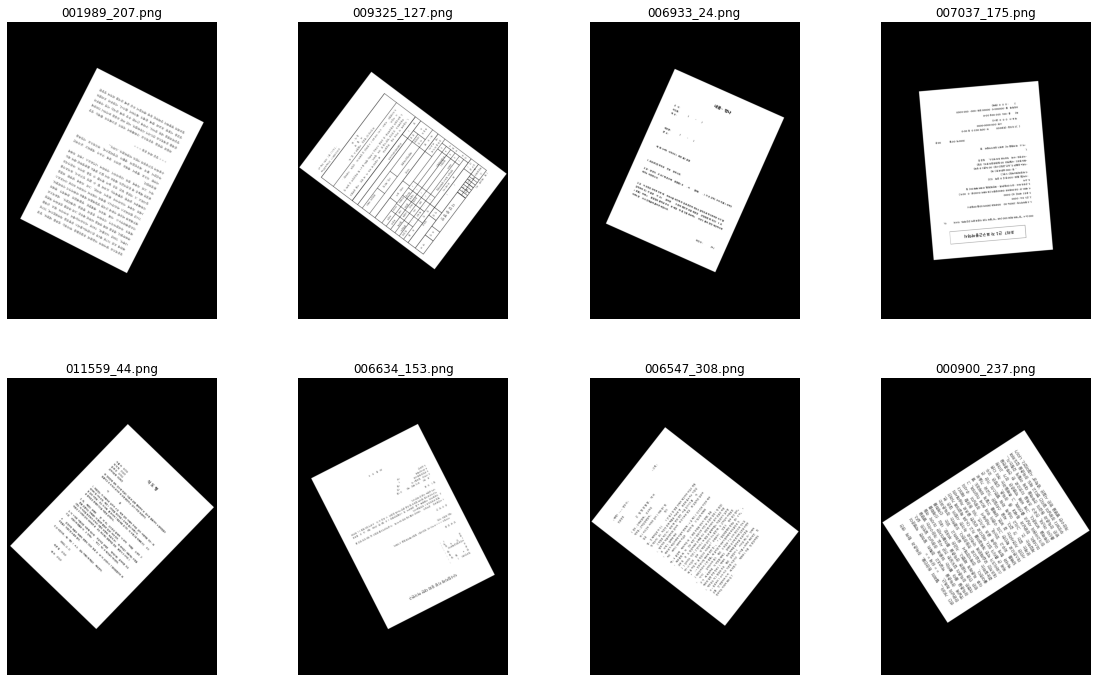

In [108]:

## 랜덤하게 8장 사진을 확인
tmp_imgs = df_train['img_file'].sample(n=8, random_state=42)
plt.figure(figsize=(20, 12))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(2, 4, num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')

In [23]:
## 박스 처리

def draw_rect(drawcontext, pos, outline=None, width=0):
    (x1, y1) = (pos[0], pos[1])
    (x2, y2) = (pos[2], pos[3])
    points = (x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)
    drawcontext.line(points, fill=outline, width=width)

In [24]:
## train data 바운딩 처리

def make_boxing_img_train(img_name) :
    PATH = TRAIN_IMG_PATH
    data = df_train

    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)
    draw = ImageDraw.Draw(img)
    draw_rect(draw, pos, outline='red', width=10)
    
    return img

In [37]:
## test data 바운딩 처리

def make_boxing_img_test(img_name) :
    PATH = TEST_IMG_PATH
    data = df_test

    img = PIL.Image.open(os.path.join(PATH, img_name))
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)
    draw = ImageDraw.Draw(img)
    draw_rect(draw, pos, outline='red', width=10)
    
    return img

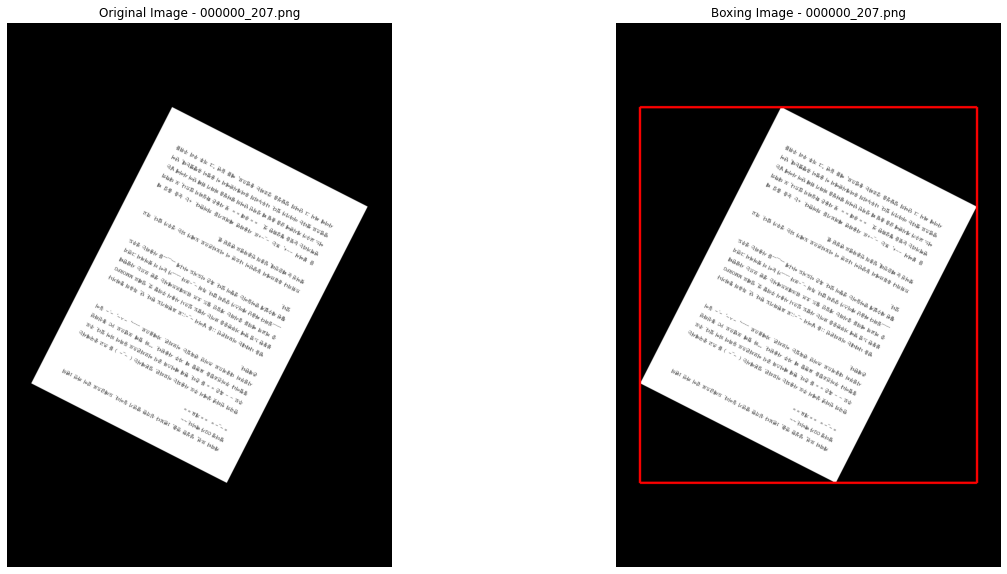

In [26]:
## 확인하고 싶은 이미지 번호 입력
f_name = "000000_207.png"

plt.figure(figsize=(20,10))

## 원본 이미지
plt.subplot(1, 2, 1)
origin_img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
plt.title("Original Image - {}".format(f_name))
plt.imshow(origin_img)
plt.axis('off')

## Bounding Box 처리 된 이미지
plt.subplot(1, 2, 2)
boxing = make_boxing_img_train(f_name)
plt.title("Boxing Image - {}".format(f_name))
plt.imshow(boxing)
plt.axis('off')

plt.show()

## 이미지 resize 하기

In [28]:
## train 이미지 resize

def crop_resize_boxing_img_train(img_name, margin=16, size=(224, 224)) :
    PATH = TRAIN_IMG_PATH
    data = df_train
        
    img = PIL.Image.open(os.path.join(PATH, img_name))
    # pos = data.loc[data["img_file"] == img_name, \
    #                ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)
    
    pos = data.loc[data["img_file"] == img_name, \
                ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)

    return img.crop((x1,y1,x2,y2)).resize(size)

In [29]:
## test 이미지 resize

def crop_resize_boxing_img_test(img_name, margin=16, size=img_size) :
    PATH = TEST_IMG_PATH
    data = df_test
        
    img = PIL.Image.open(os.path.join(PATH, img_name))
    
    # pos = data.loc[data["img_file"] == img_name, \
    #                ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)

    return img.crop((x1,y1,x2,y2)).resize(size)

In [143]:
%%time
## 폴더를 만들고 박스에 맞춰 이미지 resize (train data) 후 폴더에 저장

# os.makedirs('D:/coding/data_set/lomin/train_copy/train_crop')

for i, row in df_train.iterrows():
    cropped = crop_resize_boxing_img_train(row['img_file'])
    cropped.save(f"{'D:/coding/data_set/lomin/train_copy/train_crop'}/{row['img_file']}")

Wall time: 1h 50min 24s


In [144]:
%%time
## 폴더를 만들고 박스에 맞춰 이미지 resize (test data) 후 폴더에 저장

os.makedirs('D:/coding/data_set/lomin/train_copy/val_crop')

for i, row in df_val.iterrows():
    cropped = crop_resize_boxing_img_test(row['img_file'])
    cropped.save(f"{'D:/coding/data_set/lomin/train_copy/val_crop'}/{row['img_file']}")

Wall time: 6min 30s


In [30]:
## crop 이미지 경로 설정

TRAIN_CROP_PATH = os.path.join(DATA_PATH, 'train_crop')
TEST_CROP_PATH = os.path.join(DATA_PATH, 'val_crop')

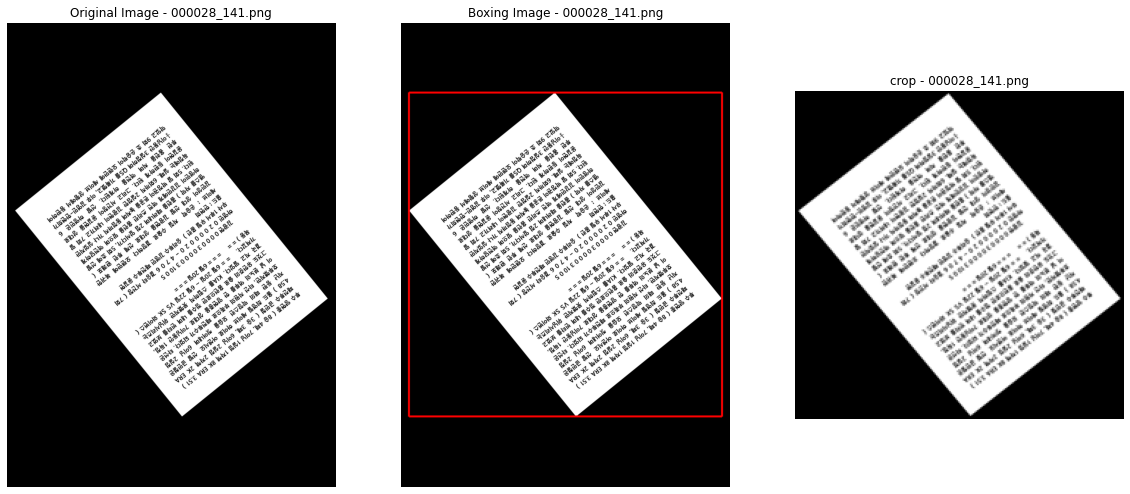

In [31]:
## 확인하고 싶은 이미지 번호 입력
f_name = "000028_141.png"

plt.figure(figsize=(20,10))

## 원본 이미지
plt.subplot(1, 3, 1)
origin_img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
plt.title("Original Image - {}".format(f_name))
plt.imshow(origin_img)
plt.axis('off')

## Bounding Box 처리 된 이미지
plt.subplot(1, 3, 2)
boxing = make_boxing_img_train(f_name)
plt.title("Boxing Image - {}".format(f_name))
plt.imshow(boxing)
plt.axis('off')

## crop 된 이미지
plt.subplot(1, 3, 3)
crop = PIL.Image.open(os.path.join(TRAIN_CROP_PATH, f_name))
plt.title("crop - {}".format(f_name))
plt.imshow(crop)
plt.axis('off')

plt.show()

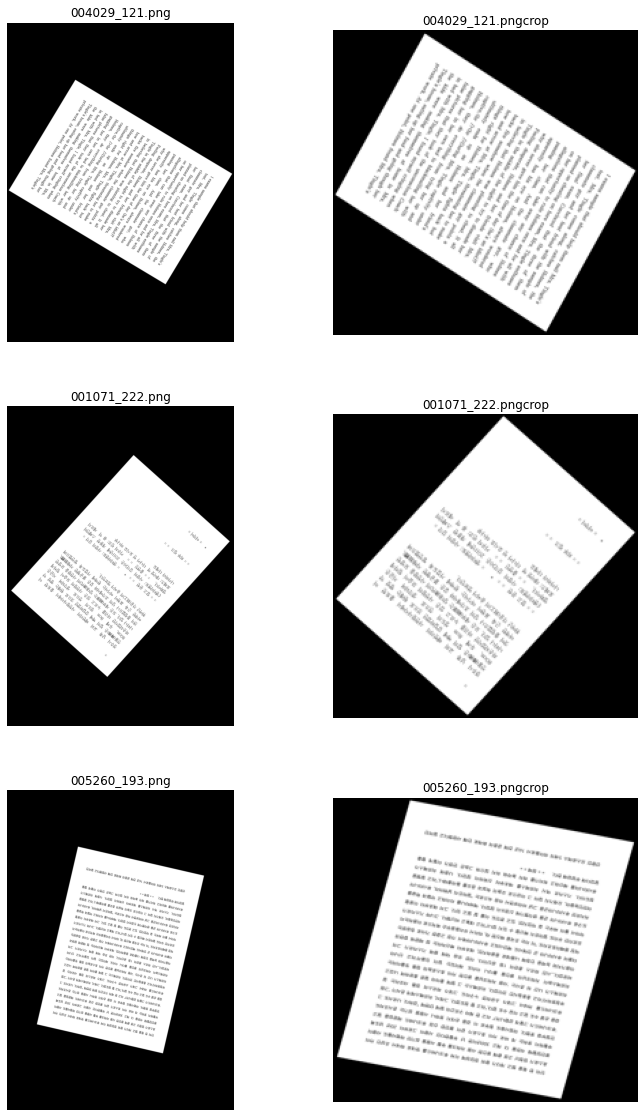

In [32]:
## crop 된 이미지 확인

tmp_imgs = df_train['img_file'].sample(n=3, random_state=42)
# tmp_imgs = df_train['img_file'][100:103]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(3, 2, 2*num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')
    
    img = PIL.Image.open(os.path.join(TRAIN_CROP_PATH, f_name))
    plt.subplot(3, 2, 2*num + 2)
    plt.title(f_name + "crop")
    plt.imshow(img)
    plt.axis('off')

## 모델링

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_file  2980 non-null   object
 1   bbox_x1   2980 non-null   object
 2   bbox_y1   2980 non-null   object
 3   bbox_x2   2980 non-null   object
 4   bbox_y2   2980 non-null   object
 5   class     2980 non-null   object
dtypes: object(6)
memory usage: 139.8+ KB


In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_file  7200 non-null   object
 1   bbox_x1   7200 non-null   object
 2   bbox_y1   7200 non-null   object
 3   bbox_x2   7200 non-null   object
 4   bbox_y2   7200 non-null   object
 5   class     7200 non-null   object
dtypes: object(6)
memory usage: 337.6+ KB


In [46]:
## train, val, test set 나눠주기

from sklearn.model_selection import train_test_split

## class 를 string 으로 바꿔주고 좌표들을 지워준다.
df_train["class"] = df_train["class"].astype('str')

df_train = df_train[['img_file', 'class']]
df_test = df_test[['img_file']]

its = np.arange(df_train.shape[0])
train_idx, val_idx = train_test_split(its, train_size = 0.8, random_state=42)

X_train = df_train.iloc[train_idx, :]
X_val = df_train.iloc[val_idx, :]

print(X_train.shape)
print(X_val.shape)
print(df_test.shape)

(86400, 2)
(21600, 2)
(7200, 1)


모델링은 keras의 generator 들을 이용하면 쉽게 만들 수 있다.

In [44]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
## 데이터 제네레이터 구성하기

## 파라미터 설정
## https://keras.io/api/preprocessing/image/

nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
nb_test_samples = len(df_test)
batch_size = 32

## 입력이미지의 데이터 증강 (Data Augmentation)

# Define Generator config
train_datagen = ImageDataGenerator(
    horizontal_flip = True, 
    vertical_flip = False,
    preprocessing_function=preprocess_input
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# val_datagen = ImageDataGenerator(rescale=1. / 255)
# train_datagen = ImageDataGenerator(rescale=1. / 255)

In [48]:
## 입력이미지의 데이터 증강 (Data Augmentation)
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

# val_datagen = ImageDataGenerator(rescale=1. / 255)
# train_datagen = ImageDataGenerator(rescale=1. / 255)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [49]:
## 제네레이터 설정
##.flow_from_dataframe
##.flow_from_directory

# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train, 
    directory=TRAIN_CROP_PATH,
    x_col = 'img_file',
    y_col = 'class',
    target_size = img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    seed=42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=X_val, 
    directory=TRAIN_CROP_PATH,
    x_col='img_file',
    y_col='class',
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=TEST_CROP_PATH,
    x_col='img_file',
    y_col=None,
    target_size= img_size,
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

Found 86400 validated image filenames belonging to 360 classes.
Found 21600 validated image filenames belonging to 360 classes.
Found 7200 validated image filenames.


In [42]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

In [50]:
## MobileNet 으로  base model을 만든다.

# weights='imagenet' : 이미지 넷에 트레이닝 된 모델을 불러옴

IMG_SHAPE = img_size + (3, )

BaseModel = MobileNet(weights='imagenet', include_top=False)

# BaseModel = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

# BaseModel = ResNet50V2(weights='imagenet', include_top=False, input_shape=IMG_SHAPE)

model = Sequential()
model.add(BaseModel)
model.add(GlobalAveragePooling2D())
model.add(Dense(360, activation='softmax', kernel_initializer='he_normal'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 360)               369000    
Total params: 3,597,864
Trainable params: 3,575,976
Non-trainable params: 21,888
_________________________________________________________________


In [51]:
## 모델 컴파일 하기
from sklearn.metrics import f1_score

def micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [52]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else :
        return num_samples // batch_size

In [53]:
## 체크포인트 설정

## monitor : val_acc 를 기준으로 저장한다.
## verbose : 1 일 경우 모델이 저장 됨을 표시

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = "my_mobilenet_model_{val_acc:.2f}_{val_loss:.4f}.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
#es = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')

callbackList = [checkpoint]

In [154]:
%%time

history = model.fit_generator(
    train_generator,
    steps_per_epoch = get_steps(nb_train_samples, batch_size),
    epochs=50,
    validation_data = validation_generator,
    validation_steps = get_steps(nb_validation_samples, batch_size),
    callbacks = callbackList
)
gc.collect()

Instructions for updating:
Please use Model.fit, which supports generators.


C:\ProgramData\Anaconda3\envs\lomin\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\envs\lomin\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
2700/2700 [==============================] - ETA: 0s - loss: 4.0865 - acc: 0.0436
Epoch 00001: val_acc improved from -inf to 0.01028, saving model to my_mobilenet_model_0.01_10.3791.h5
2700/2700 [==============================] - 1047s 388ms/step - loss: 4.0865 - acc: 0.0436 - val_loss: 10.3791 - val_acc: 0.0103
Epoch 2/50
2700/2700 [==============================] - ETA: 0s - loss: 3.1616 - acc: 0.0921
Epoch 00002: val_acc improved from 0.01028 to 0.01269, saving model to my_mobilenet_model_0.01_10.8070.h5
2700/2700 [==============================] - 721s 267ms/step - loss: 3.1616 - acc: 0.0921 - val_loss: 10.8070 - val_acc: 0.0127
Epoch 3/50
2700/2700 [==============================] - ETA: 0s - loss: 2.5077 - acc: 0.1851
Epoch 00003: val_acc improved from 0.01269 to 0.01532, saving model to my_mobilenet_model_0.02_10.8891.h5
2700/2700 [==============================] - 722s 267ms/step - loss: 2.5077 - acc: 0.1851 - val_loss: 10.8891 - val_acc: 0.0153
Epoch 4/50
2700/2700 

968

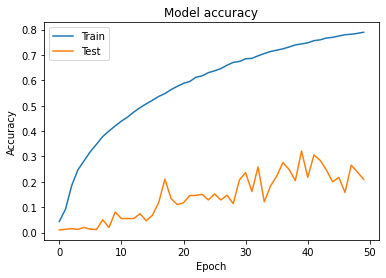

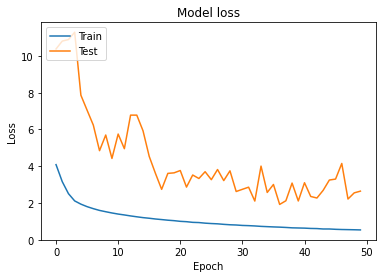

In [156]:
## 트레이닝 결과 곡선

## validation acc 곡선 그래프
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## validation loss 곡선 그래프
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
## 저장된 모델 리스트 정렬

model_list = sorted([i for i in os.listdir() if "my_" in i])
model_list

['my_mobilenet_model_0.01_10.3791.h5',
 'my_mobilenet_model_0.01_10.8070.h5',
 'my_mobilenet_model_0.02_10.8891.h5',
 'my_mobilenet_model_0.02_7.8637.h5',
 'my_mobilenet_model_0.05_4.8469.h5',
 'my_mobilenet_model_0.08_4.4238.h5',
 'my_mobilenet_model_0.12_3.6135.h5',
 'my_mobilenet_model_0.21_2.7429.h5',
 'my_mobilenet_model_0.24_2.7446.h5',
 'my_mobilenet_model_0.26_2.1062.h5',
 'my_mobilenet_model_0.28_1.9231.h5',
 'my_mobilenet_model_0.32_2.1113.h5']

In [55]:
## BEST Model 선택

model.load_weights(model_list[-1])

In [56]:
%%time
## Best Model 적용

test_generator.reset()
prediction = model.predict_generator(
    generator = test_generator,
    steps = get_steps(nb_test_samples, batch_size),
    verbose=1
)

Instructions for updating:
Please use Model.predict, which supports generators.
225/225 [==============================] - 11s 50ms/step
Wall time: 12.9 s


In [ ]:
## 결과를 표로 작성

predicted_class_indices=np.argmax(prediction, axis=1)

# Generator class dictionary mapping
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

submission = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission.csv'))
submission["class"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()

## 확인작업

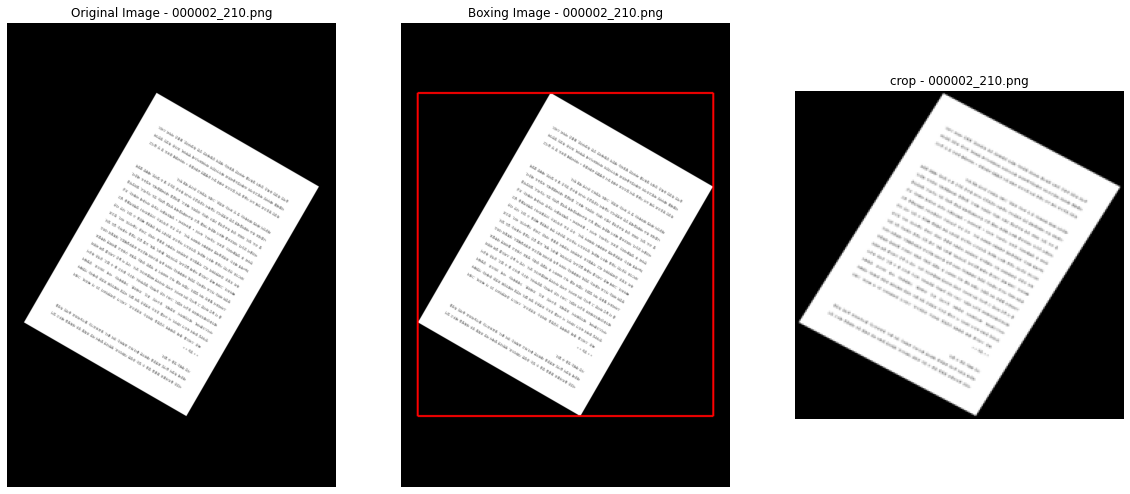

In [38]:
## test 이미지 확인
f_name = "000002_210.png"

plt.figure(figsize=(20,10))

## 원본 이미지
plt.subplot(1, 3, 1)
origin_img = PIL.Image.open(os.path.join(TEST_IMG_PATH, f_name))
plt.title("Original Image - {}".format(f_name))
plt.imshow(origin_img)
plt.axis('off')

## Bounding Box 처리 된 이미지
plt.subplot(1, 3, 2)
boxing = make_boxing_img_test(f_name)
plt.title("Boxing Image - {}".format(f_name))
plt.imshow(boxing)
plt.axis('off')

## crop 된 이미지
plt.subplot(1, 3, 3)
crop = PIL.Image.open(os.path.join(TEST_CROP_PATH, f_name))
plt.title("crop - {}".format(f_name))
plt.imshow(crop)
plt.axis('off')

plt.show()

In [ ]:
## 분류한 이미지의 추정 class 와 모델
## id = 추정 class 
## name 추정 모델 명

as1 = submission[submission['img_file'] == f_name]
df_class[df_class['id'] == int(as1.iloc[0][1])]

In [51]:
as1

,img_file,class
3451,03452.jpg,149


# 간략 평가

In [52]:
EVAL_PATH = 'E:/coding/Stanford Cars Dataset'

all100 = pd.read_csv(os.path.join(EVAL_PATH, 'test_class.csv'))
all100 = all100[['img_file', 'class']]

In [53]:
score = []
for i in range(0,8040):
    if int(all100['class'][i]) == int(submission['class'][i]) :
        score.append(1)
    else:
        score.append(0)
print('정확도 : ' , score.count(1)/8040)
print('맞은 갯수 : ' , score.count(1), ' / 8040')
print('안맞은 갯수 : ',score.count(0))

정확도 :  0.8259950248756219
맞은 갯수 :  6641  / 8040
안맞은 갯수 :  1399


## 각 class 별 정확도 확인

In [251]:
classlist = pd.read_csv(os.path.join(EVAL_PATH, 'class.csv'))

In [247]:
totalclass = pd.read_csv(os.path.join(EVAL_PATH, 'totalclass.csv'))

In [125]:
totalclass = totalclass.sort_values(by=["class"], ascending=[True])
totalclass

,img_file,class,class1,a1
4116,04117.jpg,1,1,1
3245,03246.jpg,1,1,1
1198,01199.jpg,1,1,1
8034,08035.jpg,1,1,1
75,00076.jpg,1,1,1
...,...,...,...,...
932,00933.jpg,196,196,1
621,00622.jpg,196,110,0
5965,05966.jpg,196,196,1
5722,05723.jpg,196,196,1


In [258]:
model_rate = pd.read_csv(os.path.join(EVAL_PATH, 'model_rate.csv'))
model_rate

,id,model,rate
0,71,Chevrolet Express Van 2007,0.057143
1,10,Aston Martin Virage Convertible 2012,0.333333
2,14,Audi TTS Coupe 2012,0.333333
3,104,Ferrari 458 Italia Coupe 2012,0.452381
4,23,Audi S4 Sedan 2012,0.461538
...,...,...,...
163,130,Hyundai Veloster Hatchback 2012,1.000000
164,141,Infiniti G Coupe IPL 2012,1.000000
165,152,Lamborghini Gallardo LP 570 4 Superleggera 2012,1.000000
166,154,Land Rover Range Rover SUV 2012,1.000000


In [263]:
## 50% 미만 class
model_rate[model_rate['rate'] < 0.5]

,id,model,rate
0,71,Chevrolet Express Van 2007,0.057143
1,10,Aston Martin Virage Convertible 2012,0.333333
2,14,Audi TTS Coupe 2012,0.333333
3,104,Ferrari 458 Italia Coupe 2012,0.452381
4,23,Audi S4 Sedan 2012,0.461538


In [259]:
# for i in range(1,169):
#     print(i, classlist['name'][i-1],'-', totalclass[totalclass['class'] == i]['a1'].sum() / totalclass[totalclass['class'] == i]['class'].count())
#     i+=i

In [ ]:
"""
참고

캐글 차분류 : https://www.kaggle.com/c/2019-3rd-ml-month-with-kakr/overview


3등 : https://www.kaggle.com/seriousran/cutout-augmentation-on-keras-efficientnet
    
배경제거 : https://www.kaggle.com/cruiserx/3rd-ml-month-car-image-segmentation-crop
        
주 카피 : https://www.kaggle.com/daehungwak/keras-how-to-use-pretrained-model
        
로우 카피 : https://www.kaggle.com/fulrose/3rd-ml-month-car-model-classification-baseline
"""

---
---
---
추가로 직쩝 찍은 사진과, 국내 중고차 사진을 라벨링하여 모델에 돌려 보았다 시간 관계상 작은 숫자의 샘플밖에 실행하지 못하였다.

실제로 돌려작업을 해보려 하였다


## 추가 파일 확인

In [55]:
N_TEST = os.path.join(DATA_PATH, 'test_dj')
n_test = pd.read_csv(os.path.join(DATA_PATH, 'test_dj.csv'))

In [56]:
n_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [57]:
nb_n_test_samples = len(n_test)

In [58]:
n_test_generator = n_test_datagen.flow_from_dataframe(
    dataframe=n_test,
    directory=N_TEST,
    x_col='img_file',
    y_col=None,
    target_size= img_size,
    color_mode='rgb',
    class_mode=None,
    batch_size=batch_size,
    shuffle=False
)

Found 57 validated image filenames.


In [59]:
%%time
## Best Model 적용

n_test_generator.reset()
prediction = model.predict_generator(
    generator = n_test_generator,
    steps = get_steps(nb_n_test_samples, batch_size),
    verbose=1
)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1996: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2/2 [==============================] - 1s 354ms/step
Wall time: 1.04 s


## 추가 결과표 작성

In [60]:
## 결과를 표로 작성

predicted_class_indices=np.argmax(prediction, axis=1)

# Generator class dictionary mapping
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

submission2 = pd.read_csv(os.path.join(DATA_PATH, 'sample_submission2.csv'))
submission2["class"] = predictions
submission2.to_csv("submission2.csv", index=False)
submission2.head()

,img_file,class
0,001.jpg,132
1,002.jpg,49
2,003.jpg,132
3,004.jpg,132
4,005.jpg,7


## 간략평가

In [61]:
#EVAL_PATH = 'E:/coding/Stanford Cars Dataset'

all1000 = pd.read_csv(os.path.join(EVAL_PATH, 'test_dj_class.csv'))
all1000 = all1000[['img_file', 'class']]

In [62]:
score1 = []
for i in range(0,57):
    if int(all1000['class'][i]) == int(submission2['class'][i]) :
        score1.append(1)
    else:
        score1.append(0)
print('정확도 : ' , score1.count(1)/57)
print('맞은 갯수 : ' , score1.count(1), ' / 57')
print('안맞은 갯수 : ',score1.count(0))

정확도 :  0.3333333333333333
맞은 갯수 :  19  / 57
안맞은 갯수 :  38
